In [90]:
bbox_label_path = '../data/bbox_labels/all_images/'
keypoint_labels_path = '../data/key_point_labels/labels_2016.csv'

In [127]:
import pandas as pd

keypoints_df = pd.read_csv(keypoint_labels_path)

keypoints_df.columns

Index(['Unnamed: 0', 'filename', 'whale_id', 'rostrum_x', 'rostrum_y',
       'side1_head1_x', 'side1_head1_y', 'side1_head2_x', 'side1_head2_y',
       'side1_eye_x', 'side1_eye_y', 'side1_body1_x', 'side1_body1_y',
       'side1_body2_x', 'side1_body2_y', 'side1_body3_x', 'side1_body3_y',
       'side1_peduncle_width_x', 'side1_peduncle_width_y', 'peduncle_x',
       'peduncle_y', 'side2_peduncle_width_x', 'side2_peduncle_width_y',
       'side2_body3_x', 'side2_body3_y', 'side2_body2_x', 'side2_body2_y',
       'side2_body1_x', 'side2_body1_y', 'side2_eye_x', 'side2_eye_y',
       'side2_head2_x', 'side2_head2_y', 'side2_head1_x', 'side2_head1_y',
       'blowhole_x', 'blowhole_y', 'len_mid_x', 'len_mid_y', 'fluke_x',
       'fluke_y', 'Image.Length', 'Image.Width'],
      dtype='object')

In [128]:
bbox_dict = dict()
for index,row in keypoints_df.iterrows():
    filename = row.filename[:-4]
    value = bbox_dict.get(filename,list())
    with open(bbox_label_path+filename+'.txt', 'r') as file:
        for line in file:
            components = line.split()
            cx, cy, w, h = [float(x) for x in components[1:5]]
            bbox = [cx,cy,w,h]
            value.append(bbox)
    bbox_dict[filename]=value

# bbox_dict

In [143]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def match_whale_bbox(bboxes,mid_x,mid_y,img_h,img_w):
    min_index = 0
    min_dist=999999
    for i in range(len(bboxes)):
        cx,cy,_,_ = bboxes[i]
        dist =( (cx*img_w-mid_x)**2 + (cy*img_h-mid_y)**2 )**(1/2)
        if(dist<min_dist):
            min_dist = dist
            min_index = i
    return min_index


        

def plot(img_path, bbox, kpts):
    cx,cy,w,h = bbox
    x = cx - w/2
    y = cy - h/2
    fig, ax = plt.subplots()
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='b', facecolor='none')
    ax.add_patch(rect)
    for i in range(0,len(kpts),2):
        x,y = kpts[i],kpts[i+1]
        ax.plot(x, y, 'bo', markersize=2)  
        
    plt.show()


    
    
    

[[0.482307, 0.561091, 0.598485, 0.240741], [0.684327, 0.690719, 0.232322, 0.176768]]


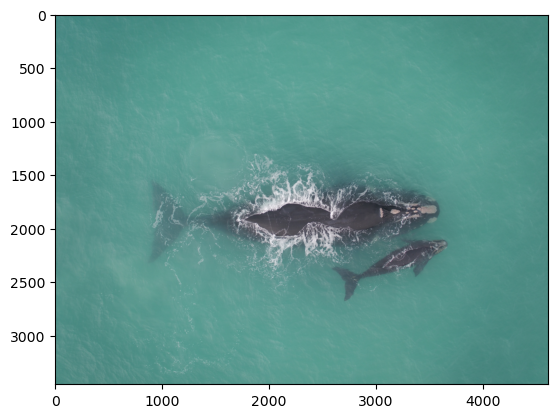

In [144]:
img_name = '2016.07.20.318.02'
img_path = '../data/images/val/'+img_name+'.jpg'
bboxes = bbox_dict[img_name]
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h,w,_ = img.shape
plt.imshow(img)
print(bboxes)

In [145]:
kpts = keypoints_df.loc[keypoints_df.filename==img_name+'.JPG','rostrum_x':'fluke_y'].values.flatten().tolist()
x = keypoints_df.loc[keypoints_df.filename==img_name+'.JPG','len_mid_x'].item()
y = keypoints_df.loc[keypoints_df.filename==img_name+'.JPG','len_mid_y'].item()
index = match_whale_bbox(bboxes,x,y,h,w)
# print(bboxes[index])
box = bboxes[index].copy()
print(index)
print(box)
print(h,w)

0
[0.482307, 0.561091, 0.598485, 0.240741]
3456 4608


In [146]:


box[0]*=w
box[1]*=h
box[2]*=w
box[3]*=h
box

[2222.470656, 1939.130496, 2757.8188800000003, 832.000896]

In [147]:
0.684327*4608

3153.378816

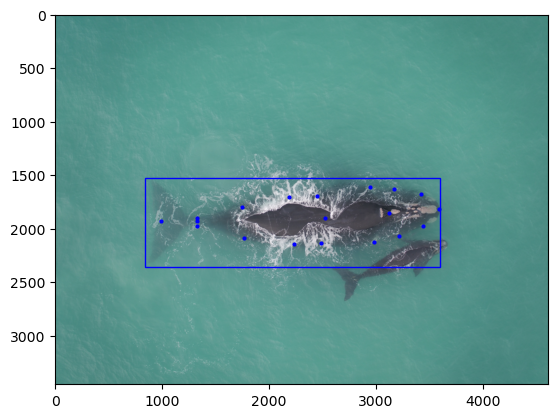

In [148]:
plot(img_path,box,kpts)

In [122]:
len(kpts)

38

In [89]:
bboxes[index]

[2222.470656, 1939.130496, 2757.8188800000003, 832.000896]

In [15]:
cnt=0
cls=0
for index,row in keypoints_df.iterrows():
    filename = row.filename[:-4]
    print("File Name: ",filename)
    print("Number of Whale bbox: ",  len(bbox_dict[filename]))
    h,w = row['Image.Length'], row['Image.Width']
    index = 0
    if len(bbox_dict[filename])>1:
        index = match_whale_bbox(bbox_dict[filename],row.len_mid_x,row.len_mid_y)
    print(index)
    break

File Name:  2016.06.25.06.01
Number of Whale bbox:  1
0
